# Final Project: traffic indidents in San Francisco

## Part 4: Motorcyclist Deaths

#### in this section, I will take a look at motorcyclist deaths, and look for patterns and interesting facts. Because there were not enough e-scooter data to form convincing statements

#### Filtering Data

In [4]:
import sys
from pathlib import Path

sys.path.insert(0, "/home/jovyan/final_project/final-group26")

from tools.part04tools.tool import group_data

import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv("../data/cleaned_fatality_data.csv")
df_motorcyclist = df[df["deceased"] == "Motorcyclist"]


#### We will construct a bar chart to see has the traffic safety increased over the year in the city of San Francisco

In [5]:
motorcyclist_deaths_by_year = group_data(df_motorcyclist, "year")
motorcyclist_deaths_by_year

year
2014    4
2015    6
2016    1
2017    4
2018    2
2019    1
2020    7
2021    8
2022    6
2023    1
2024    4
2025    3
dtype: int64

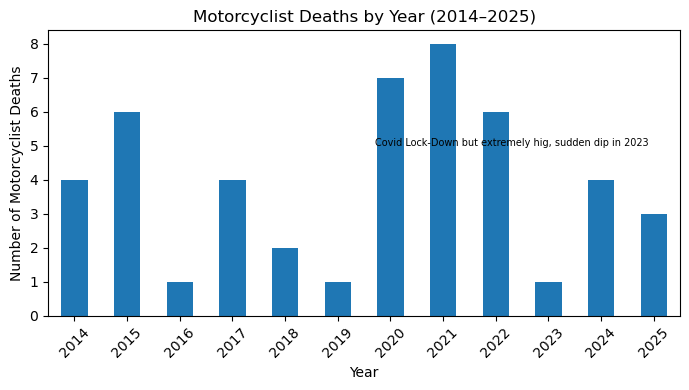

In [73]:
plt.figure(figsize=(7,4))
motorcyclist_deaths_by_year.plot(kind="bar")
plt.xlabel("Year")
plt.ylabel("Number of Motorcyclist Deaths")
plt.title("Motorcyclist Deaths by Year (2014–2025)")
plt.xticks(rotation=45)
plt.tight_layout()
plt.text(
    5.7, 5,                     
    "Covid Lock-Down but extremely hig, sudden dip in 2023",     # text
    fontsize=7
)

plt.savefig("../figures/motorcyclist_death_over_years.png", dpi=300)
plt.show()


#### We will construct a line chart to see which months has the least motorcyclist deaths

In [62]:
motorcyclist_deaths_by_month = df_motorcyclist.groupby("month").size().sort_index()
motorcyclist_deaths_by_month

month
1     3
2     3
3     6
5     3
6     4
7     3
8     8
9     3
10    7
11    3
12    4
dtype: int64

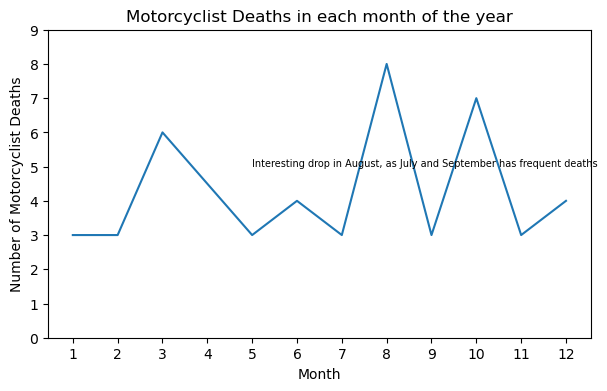

In [69]:
plt.figure(figsize=(7,4))
motorcyclist_deaths_by_month.plot(kind = "line")
plt.xlabel("Month")
plt.ylabel("Number of Motorcyclist Deaths")
plt.title("Motorcyclist Deaths in each month of the year")
plt.xticks(range(1, 13)) 
plt.yticks(range(0,10)) 
plt.text(
    5, 5,                     
    "Interesting drop in August, as July and September has frequent deaths",     # text
    fontsize=7
)

plt.savefig("../figures/motorcyclist_death_over_months.png",dpi=300)
plt.show()

#### We will construct a pie chart to see which type of incidents has the most motorcyclist deaths

In [64]:
death_by_collission_type = df_motorcyclist.groupby("collision_type").size().sort_index()
death_sorted = death_by_collission_type.sort_values(ascending=False)

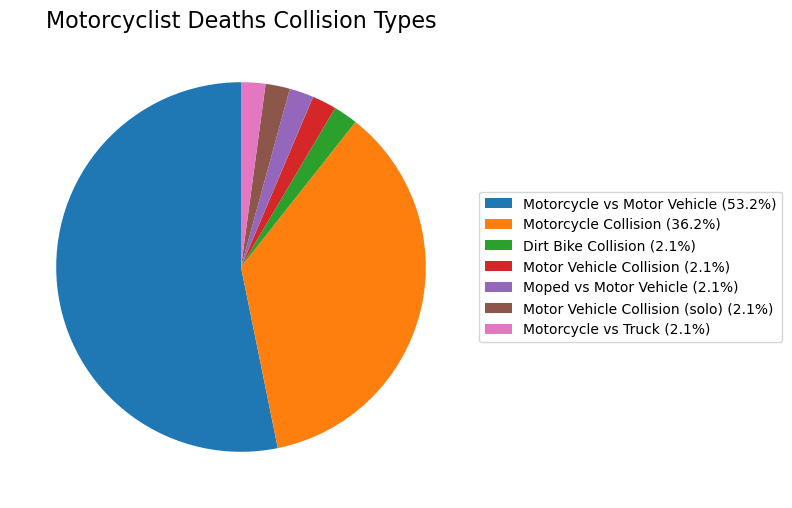

In [70]:

plt.figure(figsize=(6,6))

plt.pie(
    death_sorted,
    startangle=90
)

labels = [f"{k} ({v / death_sorted.sum():.1%})" for k, v in death_sorted.items()]


plt.legend(
    labels,
    loc="center left",
    bbox_to_anchor=(1, 0.5)
)

plt.title("Motorcyclist Deaths Collision Types",fontsize=16)
plt.savefig("../figures/motorcyclist_death_collision_types.png",dpi=300)
plt.show()


#### We will construct a line chart to see the age of motorcyclists

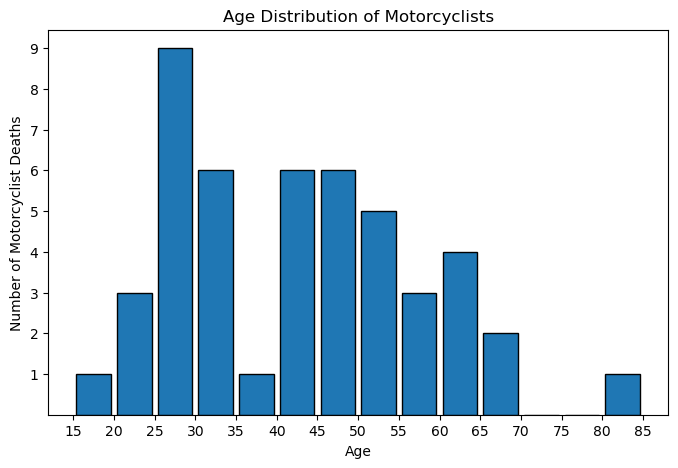

In [84]:
ages = df_motorcyclist["age"].dropna()

plt.figure(figsize=(8,5))
plt.hist(
    ages,
    bins=range(15, 90, 5),
    rwidth=0.85,          
    edgecolor="black",    
    linewidth=1           
)
plt.yticks(range(1,10))
plt.xticks(range(15,90,5))
plt.xlabel("Age")
plt.ylabel("Number of Motorcyclist Deaths")
plt.title("Age Distribution of Motorcyclists")
plt.savefig("../figures/motorcyclist_age.png",dpi=300)
plt.show()

#### Check Environment

In [85]:
import sys
sys.executable


'/srv/conda/envs/notebook/bin/python'